In [7]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from glob import glob
import warnings
from matplotlib import rcParams
warnings.filterwarnings('ignore')
%matplotlib inline
rcParams['figure.figsize'] = 8,6

In [11]:
# path = r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\drone\rmb\rtk_testing_2021_alt_prior"

# df_list = []
# for file in glob('{0}\\error.csv'.format(path)):
#     print(file)
#     df = pd.read_csv(file)
#     df_list.append(df)

In [13]:
data_ = pd.read_csv(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\drone\rmb\rtk_testing_2021_alt_prior\flight_gcp_error.csv")
data_.head()

,Flight,Alt,Camera,gcp,pixcel_m,1,2,3,4,5,6,7,8,9
0,Jenkins11,50,rbg,none,NaN,1.52,1.59,1.45,1.80,1.58,NaN,NaN,NaN,NaN
1,Jenkins11,50,rgb,c_ne_se_sw_nw,NaN,0.10,0.09,0.06,0.07,0.09,NaN,NaN,NaN,NaN
2,Jenkins11,50,multi,none,NaN,1.80,1.84,1.93,1.95,1.98,NaN,NaN,NaN,NaN
3,Jenkins11,50,multi,c_ne_se_sw_nw,NaN,0.08,9999.00,9999.00,0.01,0.04,NaN,NaN,NaN,NaN
4,Jenkins11,80,rbg,none,NaN,0.97,1.04,0.96,0.93,0.96,NaN,NaN,NaN,NaN


In [14]:
#data_ = pd.concat(df_list)

In [10]:
# remove Jenkins1
data = data_[data_['flight']!='jenkins']

In [11]:
data.head()

,flight,gcp_calibrated,height (m),area (sqm),camera,gcp,dist (m),cell size
0,palmo_oval,"Point_3, Point_5, Point_6, Point_7, Point_8",50,23852,hover,Point_3,0.055129,0.02714
1,palmo_oval,"Point_3, Point_5, Point_6, Point_7, Point_9",50,23852,hover,Point_5,0.005000,0.02714
2,palmo_oval,"Point_3, Point_5, Point_6, Point_7, Point_10",50,23852,hover,Point_6,0.427970,0.02714
3,palmo_oval,"Point_3, Point_5, Point_6, Point_7, Point_11",50,23852,hover,Point_7,0.312870,0.02714
4,palmo_oval,"Point_3, Point_5, Point_6, Point_7, Point_12",50,23852,hover,Point_8,0.374650,0.02714


In [12]:
data.columns = ["location", "rectified", "altitude_m", "area_m2", "camera", "gcp", "distance_m", "resoloution"]

In [13]:
data = data[["location", "camera", "resoloution", "rectified", "altitude_m", "area_m2",  "gcp", "distance_m", "resoloution"]]

In [14]:
data

,location,camera,resoloution,rectified,altitude_m,area_m2,gcp,distance_m,resoloution
0,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_8",50,23852,Point_3,0.055129,0.02714
1,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_9",50,23852,Point_5,0.005000,0.02714
2,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_10",50,23852,Point_6,0.427970,0.02714
3,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_11",50,23852,Point_7,0.312870,0.02714
4,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_12",50,23852,Point_8,0.374650,0.02714
...,...,...,...,...,...,...,...,...,...
35,train_tracks_20210825,hover,0.04372,"Point_1, Point_3",80,50980,Point_01,1.794597,0.04372
36,train_tracks_20210825,hover,0.04372,"Point_1, Point_3",80,50980,Point_02,1.770696,0.04372
37,train_tracks_20210825,hover,0.04372,"Point_1, Point_3",80,50980,Point_03,1.781283,0.04372
38,train_tracks_20210825,hover,0.04372,"Point_1, Point_3",80,50980,Point_05,1.844770,0.04372


In [15]:
# fill distance_m with 0
data.distance_m = data.distance_m.fillna(0)

In [16]:
#data_no = data[data['rectified'] != data.gcp]

In [17]:
#data_no.info()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 39
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location     70 non-null     object 
 1   camera       70 non-null     object 
 2   resoloution  70 non-null     float64
 3   rectified    70 non-null     object 
 4   altitude_m   70 non-null     int64  
 5   area_m2      70 non-null     int64  
 6   gcp          70 non-null     object 
 7   distance_m   70 non-null     float64
 8   resoloution  70 non-null     float64
dtypes: float64(3), int64(2), object(4)
memory usage: 5.5+ KB


In [19]:
data.distance_m.describe()

count    70.000000
mean      1.141360
std       0.775325
min       0.000000
25%       0.184818
50%       1.752304
75%       1.779470
max       1.913505
Name: distance_m, dtype: float64

In [20]:
final_list = []
for i in data.rectified:
    if i != 'no_gcp':
        list_b = i.split(',')
        #print(list_b)
        value = len(list_b)
        #print(value)
        final_list.append(value)
        #print('_'*50)
    else:
        final_list.append(0)
    

In [21]:
data['gcp_count'] = final_list

In [22]:
no_gcp = data[data['rectified'] == 'no_gcp']
gcp = data[data['rectified'] != 'no_gcp']

In [23]:
data.head()

,location,camera,resoloution,rectified,altitude_m,area_m2,gcp,distance_m,resoloution,gcp_count
0,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_8",50,23852,Point_3,0.055129,0.02714,5
1,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_9",50,23852,Point_5,0.005000,0.02714,5
2,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_10",50,23852,Point_6,0.427970,0.02714,5
3,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_11",50,23852,Point_7,0.312870,0.02714,5
4,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_12",50,23852,Point_8,0.374650,0.02714,5


In [24]:
list_data = [data, no_gcp, gcp]
list_label = ['All data', "No Ground Control Points", "Ground Control Points"]

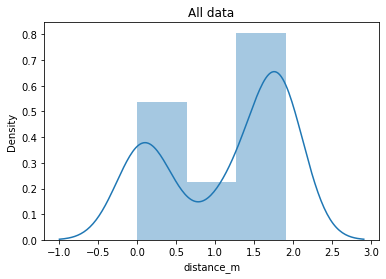

Skewness: -0.535044
Excess Kurtosis: -1.548632
Basic stats: 
Mean: 1.141360
Var: 0.601129
Std: 0.775325


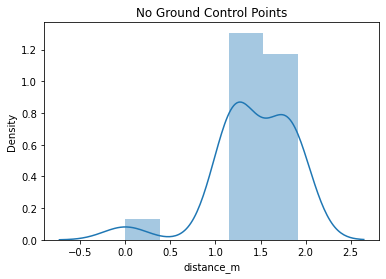

Skewness: -1.634738
Excess Kurtosis: 4.488339
Basic stats: 
Mean: 1.422793
Var: 0.197220
Std: 0.444095


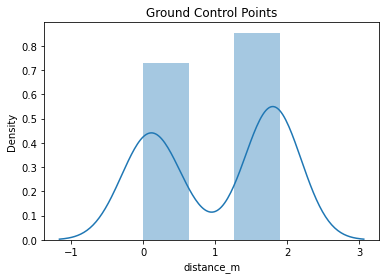

Skewness: -0.200223
Excess Kurtosis: -1.986829
Basic stats: 
Mean: 1.028786
Var: 0.724754
Std: 0.851325


In [25]:
for i, label in zip(list_data, list_label):
    sns.distplot(i.distance_m).set_title(label)
    plt.show()
    print('='*40)
    print("Skewness: %f" % i.distance_m.skew())
    print("Excess Kurtosis: %f" % i.distance_m.kurt())
    print('Basic stats: ')
    print("Mean: %f" % i.distance_m.mean())
    print("Var: %f" % i.distance_m.var())
    print("Std: %f" % i.distance_m.std())
    print('='*40)

    plt.show()

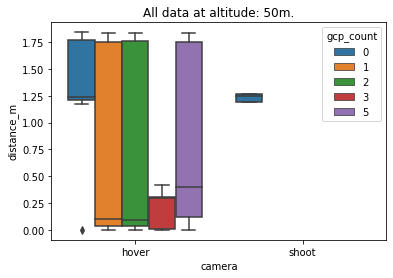


Value counts per camera / gcp_count

camera  gcp_count
hover   0            10
        1            10
        2            10
        3             5
        5            10
shoot   0             5
dtype: int64


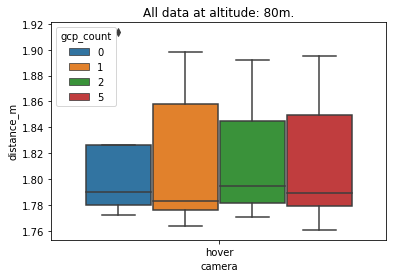


Value counts per camera / gcp_count

camera  gcp_count
hover   0            5
        1            5
        2            5
        5            5
dtype: int64


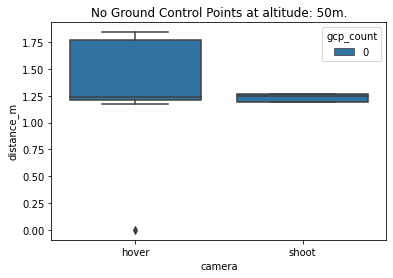


Value counts per camera / gcp_count

camera  gcp_count
hover   0            10
shoot   0             5
dtype: int64


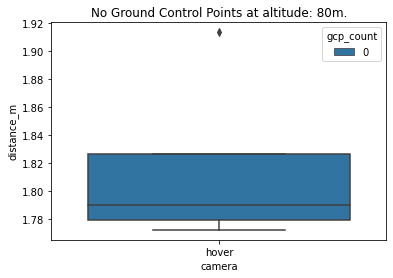


Value counts per camera / gcp_count

camera  gcp_count
hover   0            5
dtype: int64


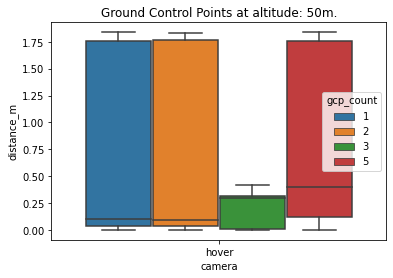


Value counts per camera / gcp_count

camera  gcp_count
hover   1            10
        2            10
        3             5
        5            10
dtype: int64


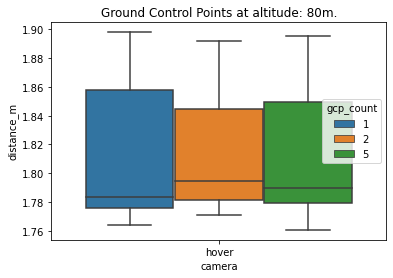


Value counts per camera / gcp_count

camera  gcp_count
hover   1            5
        2            5
        5            5
dtype: int64


In [26]:
for i, label in zip(list_data, list_label):
    alt_list = i.altitude_m.unique().tolist()
    for n in alt_list:
        df = i[i['altitude_m']==n]
        sns.boxplot(x='camera', y='distance_m', data=df, hue="gcp_count").set_title(label + ' at altitude: ' + str(n) + 'm.')
        #plt.subplots(figsize=(8, 6))
        plt.show()
        print('='*40)
        print('\nValue counts per camera / gcp_count\n')

        print(df.groupby(['camera', 'gcp_count']).size())


        plt.show()

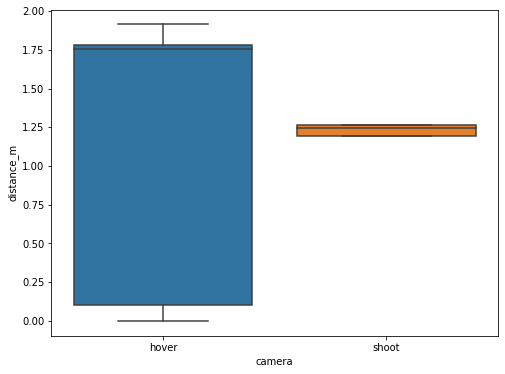

In [27]:
#box plot overallqual/saleprice
var = 'camera'
#data = pd.concat([data['distance'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="distance_m", data=data)

In [28]:
data

,location,camera,resoloution,rectified,altitude_m,area_m2,gcp,distance_m,resoloution,gcp_count
0,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_8",50,23852,Point_3,0.055129,0.02714,5
1,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_9",50,23852,Point_5,0.005000,0.02714,5
2,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_10",50,23852,Point_6,0.427970,0.02714,5
3,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_11",50,23852,Point_7,0.312870,0.02714,5
4,palmo_oval,hover,0.02714,"Point_3, Point_5, Point_6, Point_7, Point_12",50,23852,Point_8,0.374650,0.02714,5
...,...,...,...,...,...,...,...,...,...,...
35,train_tracks_20210825,hover,0.04372,"Point_1, Point_3",80,50980,Point_01,1.794597,0.04372,2
36,train_tracks_20210825,hover,0.04372,"Point_1, Point_3",80,50980,Point_02,1.770696,0.04372,2
37,train_tracks_20210825,hover,0.04372,"Point_1, Point_3",80,50980,Point_03,1.781283,0.04372,2
38,train_tracks_20210825,hover,0.04372,"Point_1, Point_3",80,50980,Point_05,1.844770,0.04372,2


In [29]:
#sns.pairplot(data=data)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

,resoloution,altitude_m,area_m2,distance_m,resoloution,gcp_count
resoloution,1.000000,0.999940,0.994765,0.558942,1.000000,0.025575
altitude_m,0.999940,1.000000,0.993998,0.554187,0.999940,0.024674
area_m2,0.994765,0.993998,1.000000,0.555358,0.994765,0.053527
distance_m,0.558942,0.554187,0.555358,1.000000,0.558942,-0.147564
resoloution,1.000000,0.999940,0.994765,0.558942,1.000000,0.025575
gcp_count,0.025575,0.024674,0.053527,-0.147564,0.025575,1.000000


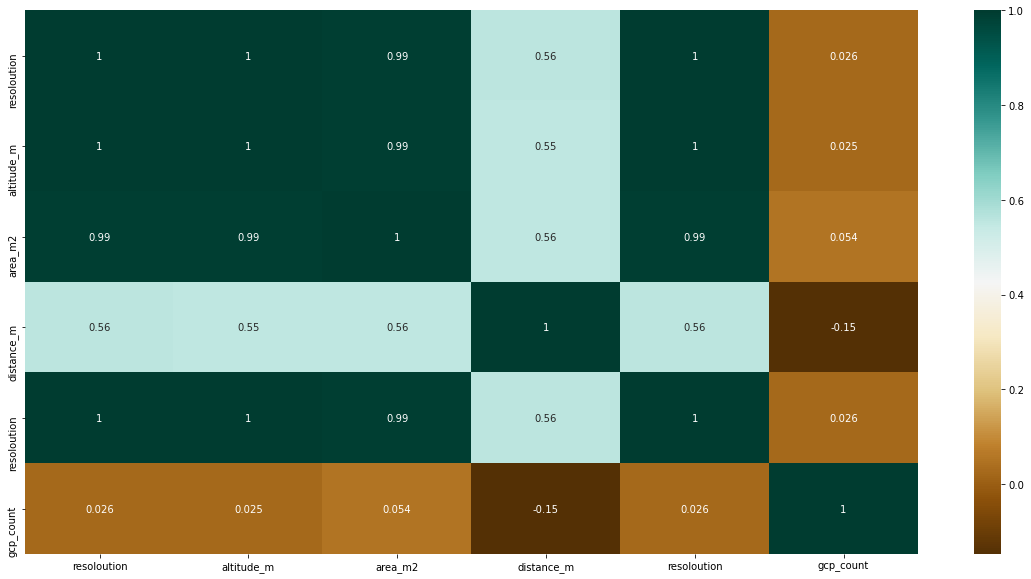

In [30]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [31]:
data.groupby(['camera', 'altitude_m', 'gcp_count'])['distance_m'].describe()

count      mean       std       min       25%  \
camera altitude_m gcp_count                                                  
hover  50         0           10.0  1.321180  0.544749  0.000000  1.208955   
                  1           10.0  0.743883  0.893868  0.000000  0.037963   
                  2           10.0  0.742628  0.895671  0.000000  0.036246   
                  3            5.0  0.207248  0.189161  0.002000  0.010000   
                  5           10.0  0.830173  0.832182  0.000000  0.119564   
       80         0            5.0  1.816214  0.058217  1.772134  1.779497   
                  1            5.0  1.815696  0.058873  1.763728  1.775834   
                  2            5.0  1.816677  0.050802  1.770696  1.781283   
                  5            5.0  1.814874  0.055979  1.760608  1.779379   
shoot  50         0            5.0  1.232597  0.034799  1.195259  1.195935   

                                  50%       75%       max  
camera altitude_m gcp_count                                
hover  50         0          1.236873  1.765482  1.841926  
                  1          0.100306  1.754523  1.838641  
                  2          0.096435  1.762249  1.833771  
                  3          0.298450  0.311300  0.414490  
                  5          0.401310  1.754523  1.838641  
       80         0          1.789742  1.826191  1.913505  
                  1          1.783328  1.857620  1.897970  
                  2          1.794597  1.844770  1.892040  
                  5          1.789480  1.849491  1.895414  
shoot  50         0          1.243634  1.263175  1.264984

------------------------------------------------------------


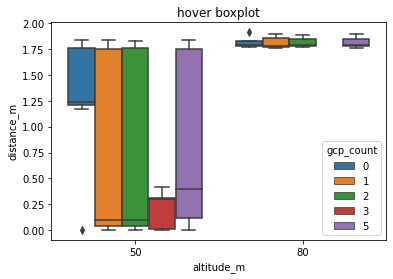

------------------------------------------------------------


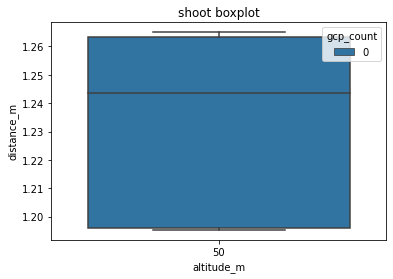

In [32]:
for cam in data.camera.unique():
    print('-'*60)
    camera_df = data[data['camera']== cam]
    sns.boxplot(x='altitude_m', y='distance_m', data=camera_df, hue="gcp_count").set(title= cam + ' boxplot')
    plt.show()
